In [15]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def Gaussexp(z, lamb):
    return 1j*lamb*(z[0]**2+z[1]**2+z[2]**2)

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)


In [21]:
# init model
lamb = 1
delta = 1
thresh = -30
tmax = 2.0
dt_init = 0.1

contour = realcontour_nd(20, (-0.5,0.5,-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [22]:
plind.descend(delta, thresh, tmax, dt_init)

refinement:  0.33716702461242676
refinement:  0.14095568656921387
refinement:  0.08765482902526855
refinement:  0.0761258602142334
refinement:  0.1105339527130127
refinement:  0.08267807960510254
refinement:  0.05121421813964844
refinement:  0.03972816467285156
refinement:  0.03941774368286133
total steps: 23 current time: 2.0000341200812666


In [43]:
plind.contour.refine_edges(delta/10)

refinement:  2.8767240047454834


In [44]:
plind.integrate()
print(plind.integral)

((3.936202077860582-3.936198402791465j), 0.0018784173060601712)


In [40]:
(1j*np.pi)**(3/2)

(-3.9374024864306048+3.937402486430605j)

In [11]:
points = plind.contour.points

In [12]:
points

array([[-2.28981779-2.28845643j,  2.28981779+2.28845643j,
        -0.7632726 -0.76281881j],
       [-2.28981779-2.28845643j,  2.28981779+2.28845643j,
         0.7632726 +0.76281881j],
       [-0.7632726 -0.76281881j,  2.28981779+2.28845643j,
        -2.28981779-2.28845643j],
       ...,
       [-0.46810077-0.46782247j, -1.61897273-1.61801021j,
         2.95171824+2.94996337j],
       [-1.43411765-1.43326503j, -1.99464596-1.9934601j ,
         0.10137214+0.10131187j],
       [ 1.50865599+1.50775906j, -2.72810322-2.7264813j ,
        -0.74240186-0.74196048j]])

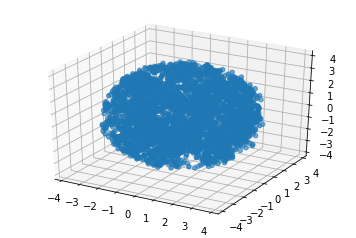

In [13]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0].real, points[:,1].real, points[:,2].real)
plt.show()

In [14]:
np.array([1,2]).T

array([1, 2])